In [3]:
import pickle 
import matplotlib.pyplot as plt
import numpy as np
from regain.data.base import load_ETF_data
from regain.hmm.hmm_graphical_lasso import HMM_GraphicalLasso 
import matplotlib.pyplot as plt
import seaborn as sns
import randomcolor
import pandas as pd

In [2]:
# load data

data = load_ETF_data()
print(data)

             VTI         SPY        EFA        VWO         TLT         IEF  \
0      55.983719  111.483650  53.489937  29.409512   58.628643   59.735962   
1      56.350910  111.979050  53.847092  29.783701   58.641998   59.793949   
2      56.538418  112.489952  54.025677  29.880840   58.460850   59.692425   
3      57.108776  113.558159  54.595730  30.255022   58.782974   59.757679   
4      57.198647  113.860085  54.602592  30.147093   59.111759   60.011406   
...          ...         ...        ...        ...         ...         ...   
3152  151.690002  298.399994  66.139999  41.380001  139.919998  111.889999   
3153  152.190002  299.279999  66.300003  41.509998  139.580002  111.849998   
3154  151.580002  297.970001  66.269997  41.400002  139.580002  111.949997   
3155  152.570007  299.989990  66.629997  41.700001  138.529999  111.540001   
3156  152.110001  299.010010  66.470001  41.669998  139.339996  111.800003   

         IAU        HYG         LQD         TIP        VNQ     

In [3]:
# Compute returns
returns_mat = np.zeros((np.size(data,axis = 0)-1,np.size(data,axis = 1)))

for i in range(1,np.size(data,axis = 0)):
    returns_mat[i-1,:] = (data.values[i,:]-data.values[i-1,:])/data.values[i-1,:]*100
        

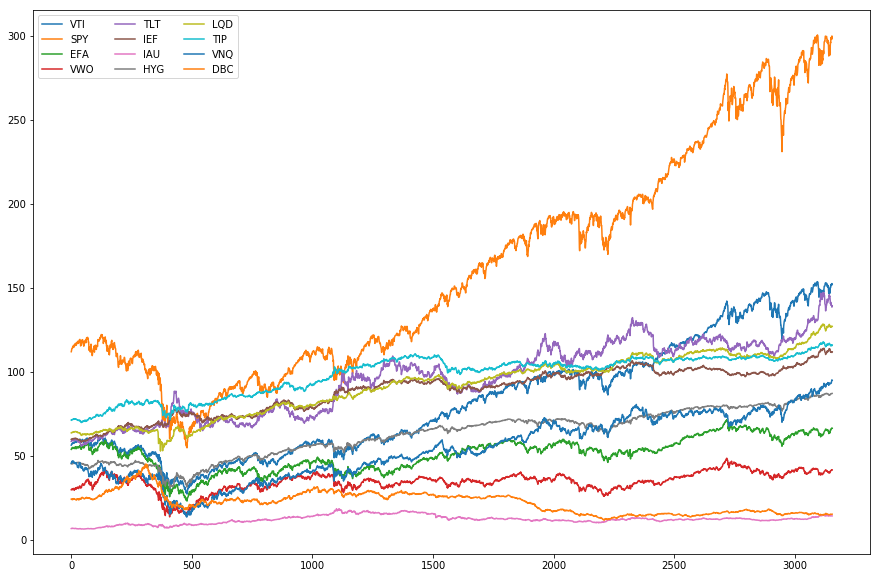

In [4]:
# Plot data

plt.figure(figsize= (15,10))
for i in range(data.shape[1]):
    plt.plot( data.values[1:, i], label = data.columns[i])
plt.legend(ncol=3)
plt.show()

In [59]:
lam = 10
max_iter = 300
N_states = 3

mdl = HMM_GraphicalLasso(alpha=lam,
                         n_clusters=N_states,
                         verbose=False,
                         max_iter=max_iter,
                         mode='scaled',
                         warm_restart=True,
                         repetitions=5,
                         n_jobs=-1)
mdl.fit(returns_mat[:1000,:])

HMM_GraphicalLasso(alpha=10, init_params={}, max_iter=300, mode='scaled',
                   n_clusters=3, n_jobs=-1, repetitions=5, tol=0.0001,
                   verbose=False, warm_restart=True)

In [60]:
mdl.lambdas

array([0.05844475, 0.01269385, 0.24321955])

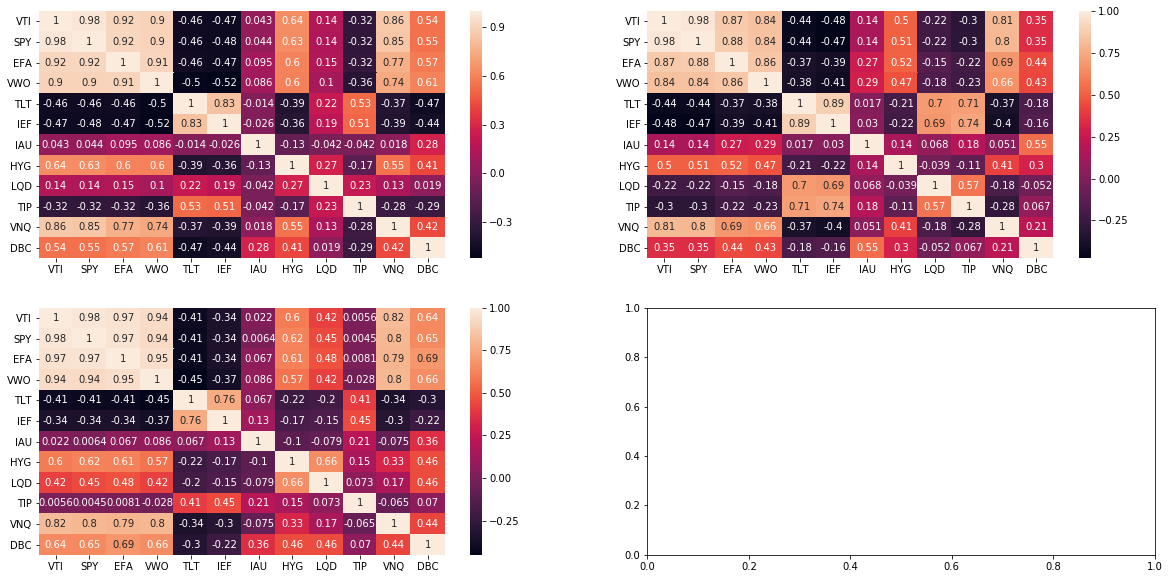

In [61]:
from regain.hmm.utils import prepare_data_to_predict,cov2corr
corr_plot(mdl.covariances_,labels = data.columns,covcorr = True)

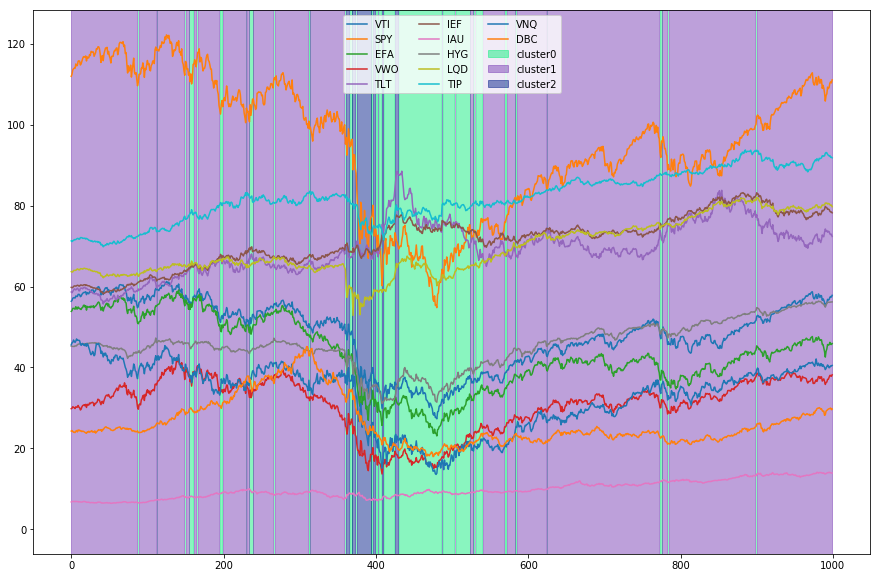

In [62]:
import randomcolor
rand_color = randomcolor.RandomColor()
fig, ax = plt.subplots(figsize=(15,10))

# Draw data 

for i in range(data.shape[1]):
    ax.plot(data.values[1:1001, i], label = data.columns[i])
    

# Draw shaded regions to highlight clusters 

for k in range(len(mdl.covariances_)):    
    ax.fill_between(np.arange(np.size(returns_mat[:1000,:],axis=0)), 0, 1, where=mdl.labels_ == k,
                color=rand_color.generate(), alpha=0.5, transform=ax.get_xaxis_transform(),label = 'cluster'+str(k))

    
plt.legend(ncol=3)
plt.show()

In [7]:
from regain.hmm.higher_order_hmm_graphical_lasso import HHMM_GraphicalLasso

lam = 0
max_iter = 300
N_states = 2

mdl = HHMM_GraphicalLasso(alpha=lam,
                         n_clusters=N_states,
                         verbose=False,
                         max_iter=max_iter,
                         mode='scaled',
                         warm_restart=True,
                         repetitions=5,
                         n_jobs=-1,
                         N_memory_trans = 2,
                         N_memory_emis=1,)
mdl.fit(returns_mat[:1000,:])

LinAlgError: Eigenvalues did not converge

In [1]:
import pickle
with open('data_difference_future.pkl','rb') as f:
    data_spread = pickle.load(f)
print(data_spread)

[[1.01 1.99 2.89 ... 6.96 7.62 8.23]
 [1.08 2.15 3.17 ... 7.72 8.42 9.07]
 [1.08 2.14 3.18 ... 7.81 8.5  9.15]
 ...
 [0.2  0.39 0.59 ... 0.98 0.97 1.02]
 [0.16 0.32 0.51 ... 0.86 0.86 0.92]
 [0.12 0.23 0.37 ... 0.43 0.39 0.41]]


In [28]:
lam = 0
max_iter = 300
N_states = 2

mdl = HMM_GraphicalLasso(alpha=lam,
                         n_clusters=N_states,
                         verbose=False,
                         max_iter=max_iter,
                         mode='scaled',
                         warm_restart=True,
                         repetitions=5,
                         n_jobs=-1)
mdl.fit(data_spread)

HMM_GraphicalLasso(alpha=0, init_params={}, max_iter=300, mode='scaled',
                   n_clusters=2, n_jobs=-1, repetitions=5, tol=0.0001,
                   verbose=False, warm_restart=True)

In [29]:
mdl.lambdas

array([0., 0.])

TypeError: object of type 'NoneType' has no len()

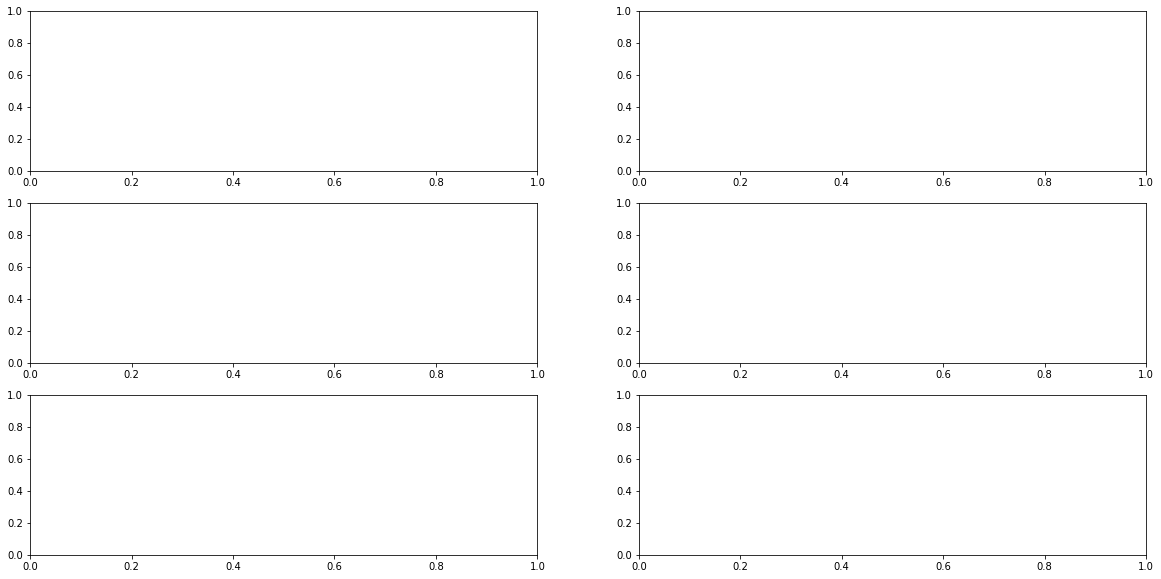

In [9]:
from regain.hmm.utils import prepare_data_to_predict,cov2corr,corr_plot
corr_plot(mdl.covariances_,covcorr = True)

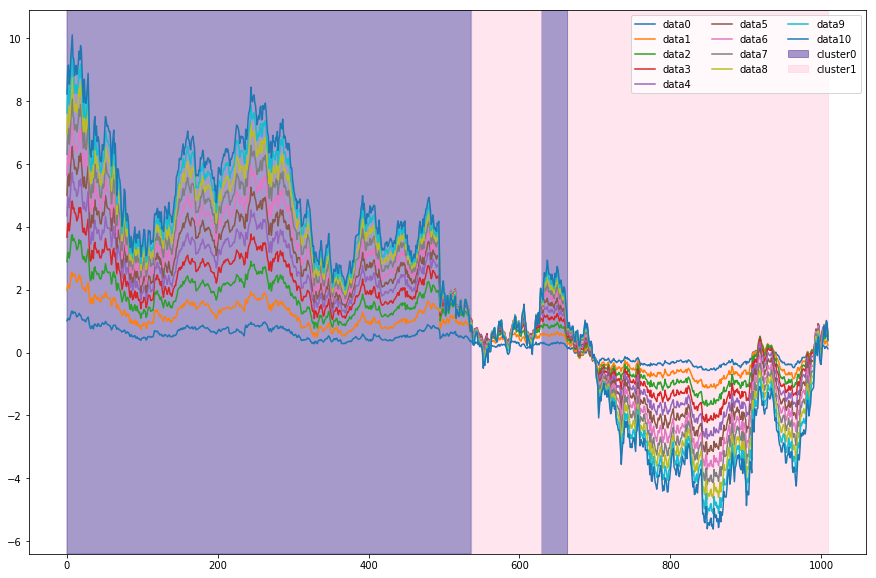

In [30]:
import randomcolor
rand_color = randomcolor.RandomColor()
fig, ax = plt.subplots(figsize=(15,10))

# Draw data 

for i in range(data_spread.shape[1]):
    ax.plot(data_spread[:, i], label = 'data'+str(i))
    

# Draw shaded regions to highlight clusters 

for k in range(len(mdl.covariances_)):    
    ax.fill_between(np.arange(np.size(data_spread,axis=0)), 0, 1, where=mdl.labels_ == k,
                color=rand_color.generate(), alpha=0.5, transform=ax.get_xaxis_transform(),label = 'cluster'+str(k))

    
plt.legend(ncol=3)
plt.show()

In [33]:
mdl.means_

array([[ 0.61794585,  1.20914908,  1.767493  ,  2.2702444 ,  2.70969494,
         3.10637302,  3.47222236,  3.81371426,  4.14034856,  4.4542644 ,
         4.7551393 ],
       [-0.12141681, -0.24162526, -0.3711314 , -0.52161474, -0.69903571,
        -0.89426934, -1.09841625, -1.30723393, -1.51735355, -1.72563242,
        -1.92929718]])

In [34]:
mdl.covariances_

[array([[0.04904982, 0.09531346, 0.13860426, 0.17714893, 0.21210203,
         0.24470674, 0.2751466 , 0.30374354, 0.33082007, 0.35658166,
         0.38248753],
        [0.09531346, 0.19062612, 0.27963308, 0.36005188, 0.43355623,
         0.50257746, 0.56741791, 0.62847587, 0.68648954, 0.74174668,
         0.79689353],
        [0.13860426, 0.27963308, 0.41577104, 0.53899722, 0.65289088,
         0.76037093, 0.86170075, 0.95737475, 1.04851895, 1.13550434,
         1.22192929],
        [0.17714893, 0.36005188, 0.53899722, 0.7045497 , 0.85771268,
         1.00327467, 1.14084543, 1.27090297, 1.39494017, 1.51343029,
         1.63085581],
        [0.21210203, 0.43355623, 0.65289088, 0.85771268, 1.05036893,
         1.23319133, 1.40671041, 1.57085647, 1.7274321 , 1.87709314,
         2.02512699],
        [0.24470674, 0.50257746, 0.76037093, 1.00327467, 1.23319133,
         1.45381334, 1.66258873, 1.86054447, 2.04936974, 2.22993982,
         2.40829789],
        [0.2751466 , 0.56741791, 0.86170